## Exercise 2.5 - Update Methods Comparison

In [1]:
import random
import numpy as np

# Assume the action values have mean 0 and variance 1 to start with.
# Assume 2000 runs.

K = 10
STEPS = 10000
RUNS = 100

all_rewards_n = []
all_rewards_alpha = []

truth_count_n = [0] * STEPS
truth_count_alpha = [0] * STEPS

In [2]:
def find_max_index(arr, criteria):
    max_value = max(arr)
    max_indices = [i for i, val in enumerate(arr) if val == max_value]
    return random.choice(max_indices)

def get_reward(index, Q_star):
  sample = np.random.normal(loc=Q_star[index], scale=1.0)
  return sample

In [3]:
for run in range(0, RUNS):

  Q_n = [0.0] * K # sample-average approach
  visited_n = []
  reward_n = []
  N_n = [0] * K # number of steps

  Q_alpha = [0.0] * K # nonstationary approach
  visited_alpha = []
  reward_alpha = []
  N_alpha = [0] * K

  Q_star = [0] * K # ground-truth, non-stationary

  # We first select something to visit at random
  visited_n.append(random.randint(0, 9))
  visited_alpha.append(random.randint(0, 9))

  ground_truth_index = [i for i, val in enumerate(Q_star) if val == max(Q_star)]

  for step in range(0, STEPS):

    # Epsilon = 0.1, meaning only 0.1 chance to explore.
    explore = random.randint(1, 10)

    n_visit = 0   # index to visit
    alpha_visit = 0 # index to visit

    if explore == 1:
      n_visit = random.randint(0, 9)
      alpha_visit = random.randint(0, 9)

      visited_n.append(n_visit)
      visited_alpha.append(alpha_visit)

    else:
      n_visit = find_max_index(Q_n, visited_n)
      alpha_visit = find_max_index(Q_alpha, visited_alpha)

    N_n[n_visit] = N_n[n_visit] + 1
    N_alpha[alpha_visit] = N_alpha[alpha_visit] + 1

    immediate_reward_n = get_reward(n_visit, Q_star)
    immediate_reward_alpha = get_reward(alpha_visit, Q_star)

    Q_n[n_visit] += (1/N_n[n_visit]) * (immediate_reward_n - Q_n[n_visit])
    Q_alpha[alpha_visit] += 0.1 * (immediate_reward_alpha - Q_alpha[alpha_visit])

    reward_n.append(Q_n[n_visit])
    reward_alpha.append(Q_alpha[alpha_visit])

    if n_visit in ground_truth_index:
      truth_count_n[step] += 1
    if alpha_visit in ground_truth_index:
      truth_count_alpha[step] += 1

    # Keeping ground-truth consistent across experiments
    for i in range(0, len(Q_star)):
      Q_star[i] += np.random.normal(loc=0, scale=0.01)

    ground_truth_index = [i for i, val in enumerate(Q_star) if val == max(Q_star)]


  if run % 10 == 0:
    print("epoch ", run)

  all_rewards_n.append(reward_n)
  all_rewards_alpha.append(reward_alpha)


epoch  0
epoch  10
epoch  20
epoch  30
epoch  40
epoch  50
epoch  60
epoch  70
epoch  80
epoch  90


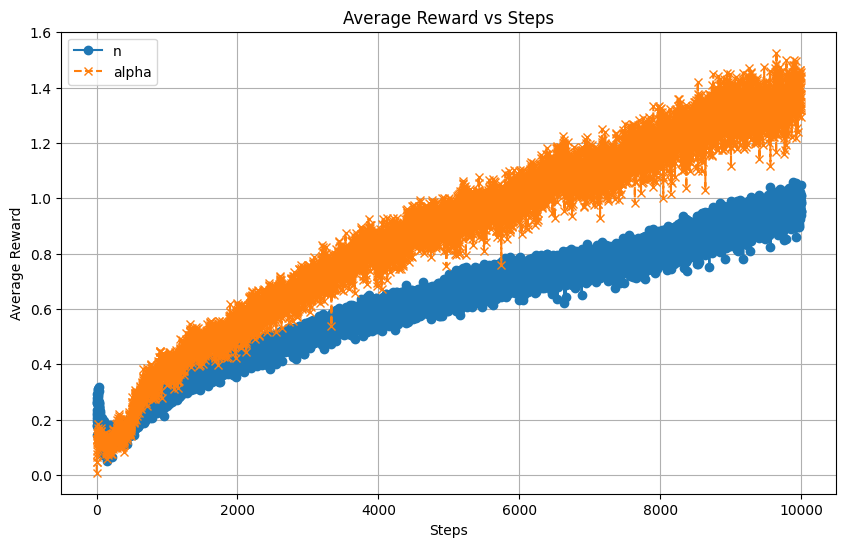

In [4]:
import matplotlib.pyplot as plt

total_reward_n = np.mean(all_rewards_n, axis=0)
total_reward_alpha = np.mean(all_rewards_alpha, axis=0)


# Generate steps (index + 1)
steps_n = [i+1 for i in range(len(reward_n))]
steps_alpha = [i+1 for i in range(len(reward_alpha))]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(steps_n, total_reward_n, label='n', marker='o', linestyle='-')
plt.plot(steps_alpha, total_reward_alpha, label='alpha', marker='x', linestyle='--')

# Formatting
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Steps')
plt.legend()
plt.grid(True)
plt.show()

[100, 12, 8, 12, 9, 9, 9, 11, 7, 6, 9, 11, 9, 10, 11, 11, 14, 13, 13, 18, 19, 13, 16, 12, 11, 13, 14, 12, 11, 15, 11, 16, 15, 16, 12, 13, 14, 14, 13, 14, 16, 11, 12, 13, 11, 18, 17, 19, 22, 18, 15, 16, 17, 16, 14, 14, 17, 15, 18, 17, 18, 13, 14, 14, 17, 14, 18, 21, 21, 19, 17, 15, 17, 17, 18, 19, 18, 15, 18, 16, 19, 19, 23, 21, 22, 22, 26, 25, 26, 27, 24, 20, 23, 22, 17, 21, 20, 20, 16, 18, 18, 15, 17, 15, 16, 14, 15, 14, 19, 17, 18, 19, 17, 19, 16, 23, 22, 19, 20, 16, 15, 19, 17, 20, 16, 17, 14, 18, 16, 20, 22, 21, 22, 24, 24, 26, 25, 23, 23, 18, 20, 22, 22, 23, 21, 22, 23, 26, 23, 20, 23, 21, 14, 22, 23, 22, 23, 20, 23, 20, 23, 22, 24, 21, 23, 22, 20, 25, 26, 28, 28, 29, 28, 22, 24, 24, 22, 23, 26, 28, 24, 24, 21, 25, 28, 24, 28, 29, 26, 27, 32, 32, 30, 27, 24, 29, 29, 34, 26, 28, 28, 27, 27, 28, 30, 25, 25, 26, 24, 27, 27, 25, 26, 27, 22, 27, 27, 25, 28, 22, 20, 29, 28, 25, 26, 27, 27, 27, 26, 24, 26, 27, 22, 24, 28, 30, 29, 27, 25, 21, 22, 27, 25, 30, 29, 29, 27, 27, 23, 24, 27, 29

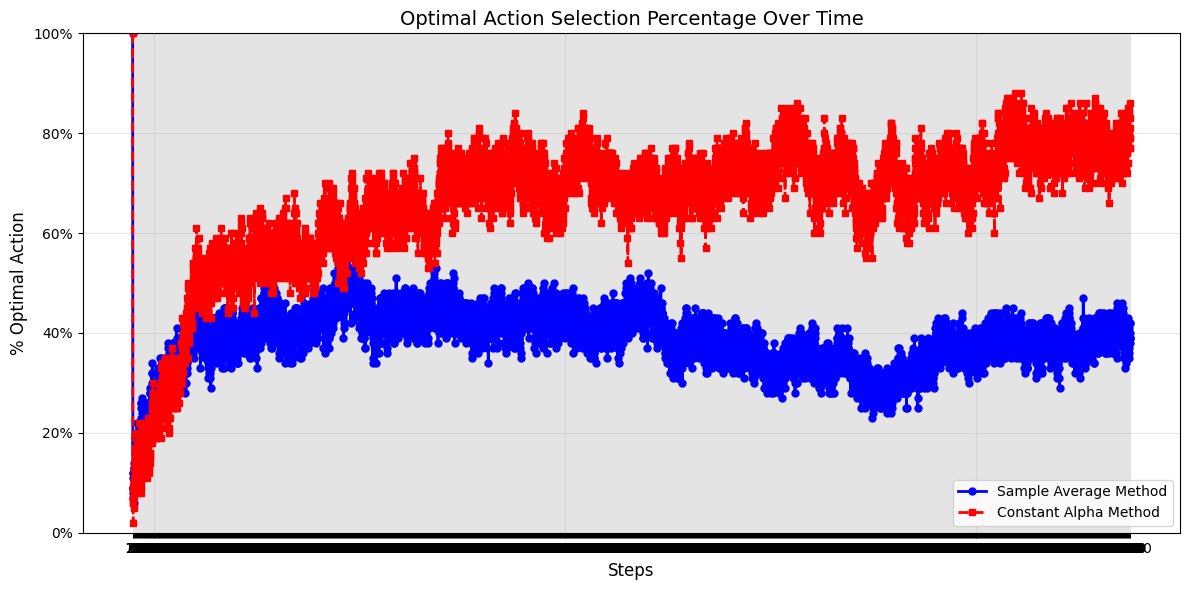

In [5]:
print(truth_count_n)
print(truth_count_alpha)

# Convert counts to percentages
percentage_n = [(count / RUNS) * 100 for count in truth_count_n]
percentage_alpha = [(count / RUNS) * 100 for count in truth_count_alpha]

# Create steps array (1-based index)
steps = np.arange(1, len(truth_count_n) + 1)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot both series
plt.plot(steps, percentage_n,
         label='Sample Average Method',
         color='blue',
         linewidth=2,
         marker='o',
         markersize=5)

plt.plot(steps, percentage_alpha,
         label='Constant Alpha Method',
         color='red',
         linewidth=2,
         linestyle='--',
         marker='s',
         markersize=5)

# Formatting
plt.xlabel('Steps', fontsize=12)
plt.ylabel('% Optimal Action', fontsize=12)
plt.title('Optimal Action Selection Percentage Over Time', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.ylim(0, 100)  # Ensure percentage scale from 0-100%

# Add percentage formatting to y-axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

# Show every 10th step on x-axis for clarity
plt.xticks(np.arange(0, len(steps)+1, 10))

plt.tight_layout()
plt.show()

Exercise 2.11 is omitted because of the RAM it takes...